In [19]:
import pandas as pd

myData = pd.read_csv('/Users/alexandergursky/Local_Repository/Datasets/Structured/CSV/housing.csv')

In [20]:
def rmna_percent(data, decimal_percent=100, axis=1):
    """Removes rows or columns containing NA/Null values greater than a specified threshold in a dataframe.\n
    data = dataframe\n
    decimal_percent= threshold percentage\n
    axis= 0 or 1 (by rows, by columns)\n"""
    perc = decimal_percent
    axis = axis
    min_count =  int(((100-perc)/100)*data.shape[0] + 1)
    data = data.dropna( axis=axis, 
                thresh=min_count)
    return data


In [21]:
# Explatory searching for % of missing datapoints per variable
myData.isna().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [22]:
# Looking for the count of NA values

# Seeing that we have 20640 observations, I am electing to drop the 207 NA observiations
# as this would have no signifigant impact going forward per last explatory cell.
myData.isna().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [23]:
# Dropping 207 observations and applying to a 'backup' df
myData1 = myData.dropna()

In [24]:
# Verifying all columns are cleaned
myData1.isna().sum(axis=0)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [25]:
# Explatory search on catagorical values 
print(myData1.ocean_proximity.value_counts())

myData1.loc[myData1['ocean_proximity'] == 'ISLAND']

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


In [26]:
# Looking at a range of where these observations lie in relation to long/lat

print('Longitude Max','\t', 'Longitude Min')
print(myData1['longitude'].max(),'\t',myData1['longitude'].min())

print('Latitude Max','\t', 'Latitude Min')
print(myData1['latitude'].max(),'\t\t',myData1['latitude'].min())



Longitude Max 	 Longitude Min
-114.31 	 -124.35
Latitude Max 	 Latitude Min
41.95 		 32.54


In [27]:
# Visualization of our data
import numpy as np
import plotly.express as px

fig = px.scatter(myData1, x='median_house_value', y='median_income', size='population', color='ocean_proximity')
fig.update_layout(title_text='House Price to Income', title_x=0.5)
fig.show()


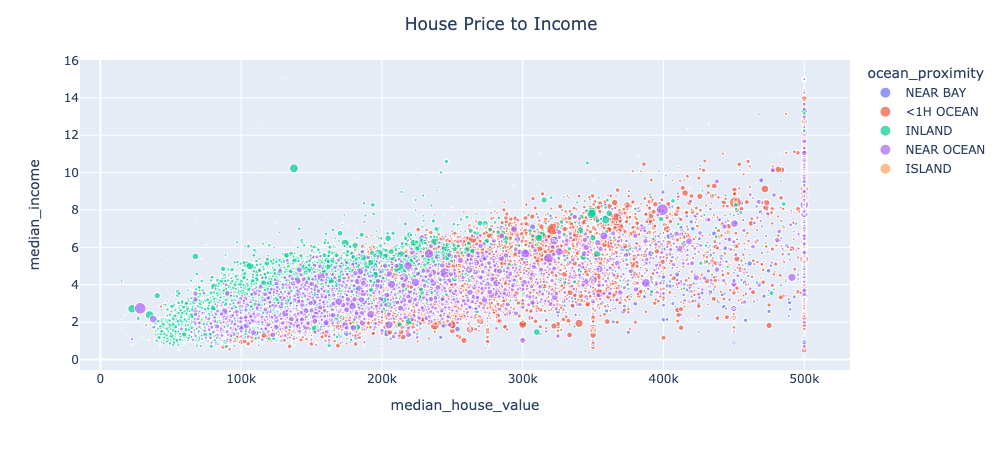

In [10]:
# Based on the visualization, we can see some discrepancies in the relation to income and home value
# in preticular on the 500k house price. Its not expected that in real life they would all be 500k
# exactly. Paired with the owners having such a vast range of income. 
# These outliers are being removed,as well as the Island based homes which we only had 5 of in 
# the lot of 20433 observations.

myData2 = myData1[(myData1['median_house_value'] <500000) & (myData1['ocean_proximity'] != 'ISLAND')]



In [11]:
# Our new plot with outliers removed while still maintaining integrity
fig2 = px.scatter(myData2, x='median_house_value', y='median_income', size='population', color='ocean_proximity')
fig2.update_layout(title_text='House Price to Income', title_x=0.5)
fig2.show()

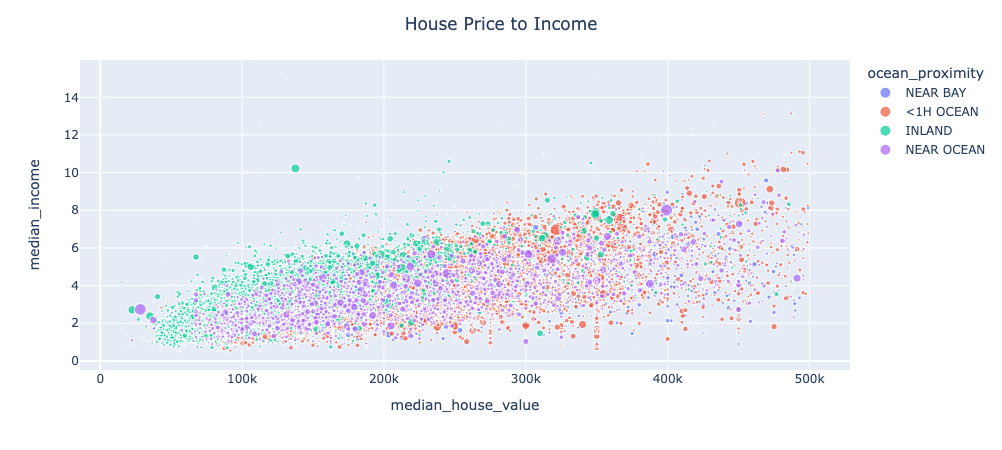

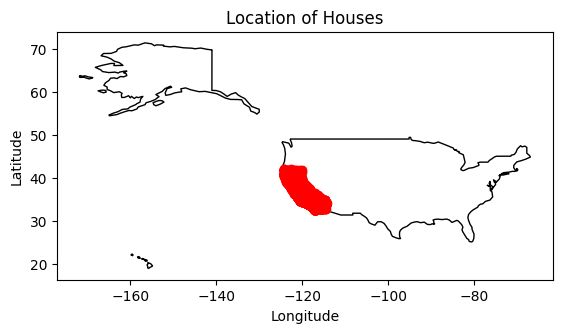

In [12]:
import matplotlib.pyplot as plt
import geopandas

# Creating subset DataFrame and geopandas DataFrame
coords = myData2[myData2.columns[0:2]]
gdf = geopandas.GeoDataFrame(coords, geometry=geopandas.points_from_xy(coords.longitude, coords.latitude))

# Getting a map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'United States of America'].plot(color='white', edgecolor= 'black')

gdf.plot(ax=ax, color= 'red')
plt.title('Location of Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [17]:
# Mapping a dictionary to a df column

# Getting the distinct/unique values in column 'ocean_proximity' as well as the count of them. I am using this to normalize.
Conditions_For_Size_df = pd.DataFrame(myData2['ocean_proximity'].value_counts()/100000)

# Creating a new 'backup' 
myData3 = pd.DataFrame.copy(myData2)

# Mapping by creating a dictionary of the prior values and searching 
# for said keys in a column, then applying the value to new column called 'point_size'.
mapping = Conditions_For_Size_df.to_dict(orient='dict')
myData3['point_size'] = myData3['ocean_proximity'].map(mapping['ocean_proximity'])

In [18]:
import plotly.graph_objects as go

map_fig = px.scatter_geo(myData3,
lat= 'latitude',
lon= 'longitude',
scope= 'usa',
color='ocean_proximity',
center= {'lat': 36.778259, 'lon':-119.417931},
template='plotly_dark')

map_fig.update_traces(marker=dict(size=.6))
map_fig.update_layout(title_text='Map of House Locations By Grouping', title_x=0.5)
map_fig.show()

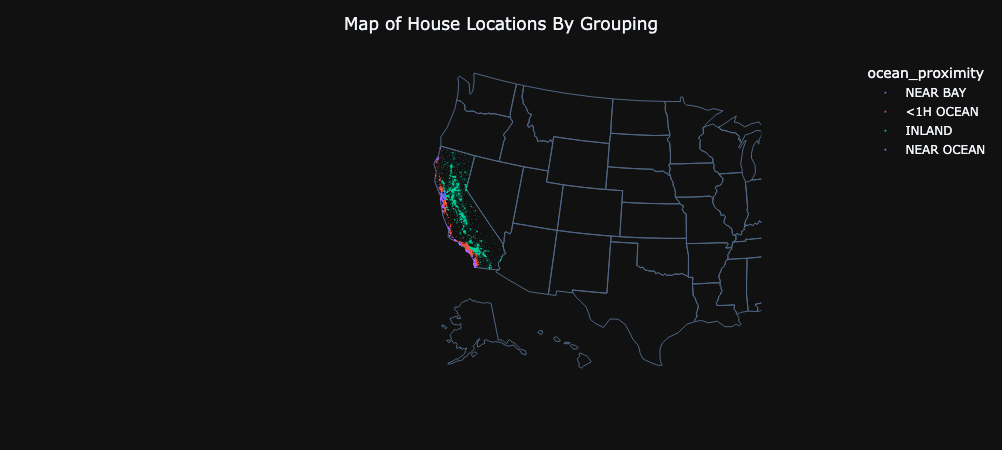